In [1]:
import pandas as pd
import numpy as np
import string 
import spacy
import nltk
import re
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

Problem

Perform sentimental analysis on the Elon-Musk tweets


In [2]:
data = pd.read_csv('Elon_musk.csv',encoding = 'latin-1',index_col=[0])

In [3]:
data

,Text
1,@kunalb11 Im an alien
2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
3,@joerogan @Spotify Great interview!
4,@gtera27 Doge is underestimated
5,@teslacn Congratulations Tesla China for amazi...
...,...
1995,"@flcnhvy True, it sounds so surreal, but the n..."
1996,@PPathole Make sure to read ur terms &amp; con...
1997,@TeslaGong @PPathole Samwise Gamgee
1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
def clean_text(text):
    
    text=re.sub('@[A-Za-z0-9]+','',str(text))
    text=re.sub('#','',str(text)) 
    text=re.sub('RT[\s]+','',str(text))
    text=re.sub('\n\n','',str(text)) 
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) 
    text=text.translate(str.maketrans('', '', string.punctuation))

    return text

data['Text']=data["Text"].apply(clean_text)
data

,Text
1,im an alien
2,aacarmack ray tracing on cyberpunk with hdr is...
3,great interview
4,doge is underestimated
5,congratulations tesla china for amazing execu...
...,...
1995,true it sounds so surreal but the negative pr...
1996,make sure to read ur terms amp conditions bef...
1997,samwise gamgee
1998,altho dumb and dumber is u0001f525u0001f525


In [9]:
elon=data.Text
elon_string=" ".join(elon)
elon_string

' i\x92m an alien aacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it   great interview  doge is underestimated  congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox  frodo was the underdoge\nall thought he would fail\nhimself most of all     haha thanks    indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely  just sent some just agree to do clubhouse with     it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler  he definitely has issues but the sentencing seems a bit high  thanks for fixing  please unlock my account  u0001f923u0001f923 this is true power haha   any crypto wallet that won\x92t give you your private keys should be avoided at all costs  your app sucks  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission \x85  yes    once we can predict c

In [10]:
text_tokens=word_tokenize(elon_string)
print(text_tokens)

['i\x92m', 'an', 'alien', 'aacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'it\x92s', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 'for', 'fixing', 'p

In [11]:
with open ("stop.txt","r") as sw:
    stop_words=sw.read()
stop_words=stop_words.split('\n')

In [12]:
tweets_no_sw=[word for word in text_tokens if word not in stop_words]
tweets_no_sw

['i\x92m',
 'alien',
 'aacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'year',
 'happy',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'thought',
 'fail',
 'haha',
 'tweets',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertaining',
 'outcome',
 'agree',
 'clubhouse',
 'it\x92s',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'toddler',
 'hodler',
 'issues',
 'sentencing',
 'bit',
 'high',
 'fixing',
 'unlock',
 'account',
 'u0001f923u0001f923',
 'true',
 'power',
 'haha',
 'crypto',
 'wallet',
 'won\x92t',
 'give',
 'private',
 'keys',
 'avoided',
 'costs',
 'app',
 'sucks',
 'nasa',
 'selected',
 'falcon',
 'heavy',
 'launch',
 'elements',
 'lunar',
 'gateway',
 'mission',
 'predict',
 'cash',
 'flow',
 'starlink',
 'ipo',
 'starlink',
 'staggeringly',
 'difficult',
 'technical',
 'amp',
 'economic',
 'endeavor',
 'don',
 'spacex',
 'pass',
 'dee

In [13]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(tweets_no_sw)

In [14]:
feature_names = tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)
df

,005,10,100,1000,10000,100kg,100m,107,10pm,10x,...,zealand,zenit,zeroes,zeros,zimon,zip2,zon,zone,zpalmer,ðogecoin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
wordslist = " ".join(df)

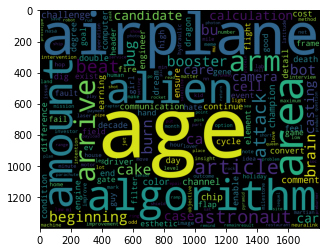

In [16]:
wordcloud=WordCloud(background_color='black',width=1800,height=1400).generate(wordslist)
plt.imshow(wordcloud)

In [17]:
with open('positive-words.txt',"r") as pos:
    positive=pos.read().split("\n")
positive_words=positive[35:]

In [20]:
positive_tweet=" ".join([word for word in df if word in positive_words])
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(positive_tweet)
    

In [21]:
with open ("negative-words.txt","r") as neg:
    negative=neg.read().split("\n")
negative_words=negative[35:]

In [22]:
negative_tweets=" ".join([word for word in df if word in negative_words])
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(negative_tweets)


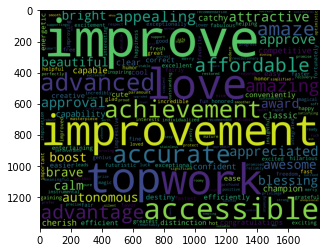

In [23]:
plt.imshow(pos_wordcloud)

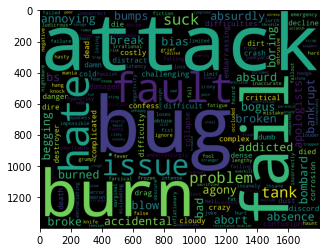

In [24]:
plt.imshow(neg_wordcloud)

In [25]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

data[["subjectivity", "polarity"]] = data.apply(sentiment_analysis, axis=1)
data

,Text,subjectivity,polarity
1,im an alien,0.750000,-0.250000
2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000
3,great interview,0.750000,0.800000
4,doge is underestimated,0.000000,0.000000
5,congratulations tesla china for amazing execu...,0.366667,0.275000
...,...,...,...
1995,true it sounds so surreal but the negative pr...,0.508333,0.111111
1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000
1997,samwise gamgee,0.000000,0.000000
1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000


In [26]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data["analysis"] = data["polarity"].apply(analysis)
data

,Text,subjectivity,polarity,analysis
1,im an alien,0.750000,-0.250000,Negative
2,aacarmack ray tracing on cyberpunk with hdr is...,0.000000,0.000000,Neutral
3,great interview,0.750000,0.800000,Positive
4,doge is underestimated,0.000000,0.000000,Neutral
5,congratulations tesla china for amazing execu...,0.366667,0.275000,Positive
...,...,...,...,...
1995,true it sounds so surreal but the negative pr...,0.508333,0.111111,Positive
1996,make sure to read ur terms amp conditions bef...,0.888889,0.500000,Positive
1997,samwise gamgee,0.000000,0.000000,Neutral
1998,altho dumb and dumber is u0001f525u0001f525,0.500000,-0.375000,Negative


In [27]:
data['analysis'].value_counts()

Neutral     898
Positive    881
Negative    220
Name: analysis, dtype: int64

In [28]:
#positive tweets
(1779/1999)*100

88.99449724862431

In [29]:
#negative tweets
(220/1999)*1000

110.05502751375688

Conclusion

Here the negative tweets are 11% so the positive tweets are 88%

# Amazon Reveiws


Extract reviews of any product from ecommerce website like snapdeal and amazon 

Perform Sentimental Analysis

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [32]:
macbook_air = []

In [33]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac

In [34]:
macbook_air

['\nLoved every bit of this gorgeous laptop. The screen, sound quality, touch, and keypad are amazing.\n',
 '\nThe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n',
 '\nBest laptop till date and unbeatable desgin and specs in today moder world as well . Anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs.  Loved the ui and user experience of apple product especially macbook is totally different from any other product\n',
 '\nThanks to Amazon for quick and safe delivery 🙏This is my first MacBook from apple, the screen quality is good as I expectedThe sound quality is amazing, with a  real Dolby and surround sound from the speakers. 👌The trackpad is quite interesting, I have never seen a such trackpad on any other laptop, 👍Overall it is good to buy, go for it without he

In [35]:
len(macbook_air)

330

In [43]:
rev={"review":macbook_air}

In [44]:
review_data = pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [45]:
review_data

,review
0,"\nLoved every bit of this gorgeous laptop. The screen, sound quality, touch, and keypad are amazing.\n"
1,\nThe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n
2,\nBest laptop till date and unbeatable desgin and specs in today moder world as well . Anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. Loved the ui and user experience of apple product especially macbook is totally different from any other product\n
3,"\nThanks to Amazon for quick and safe delivery 🙏This is my first MacBook from apple, the screen quality is good as I expectedThe sound quality is amazing, with a real Dolby and surround sound from the speakers. 👌The trackpad is quite interesting, I have never seen a such trackpad on any other laptop, 👍Overall it is good to buy, go for it without hesitation.👍\n"
4,\nThis laptop is not having SMC options as we have in Intel- Macbook.\n
...,...
325,"\nAmazing form factor and M1 rocks, blazing fast with no heating issues. Battery life feels revolutionised.\n"
326,\nEverything Good\n
327,\nAmazing battery life and great performance\n
328,\nThe best laptop as of date.\n


In [46]:
text = " ".join(review_data)

In [47]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))
    text=re.sub('#','',str(text))
    text=re.sub('RT[\s]+','',str(text))
    text=re.sub('\n\n','',str(text)) 
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) 
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [48]:
review_data

,review
0,"\nloved every bit of this gorgeous laptop. the screen, sound quality, touch, and keypad are amazing.\n"
1,\nthe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n
2,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n
3,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n"
4,\nthis laptop is not having smc options as we have in intel- macbook.\n
...,...
325,"\namazing form factor and m1 rocks, blazing fast with no heating issues. battery life feels revolutionised.\n"
326,\neverything good\n
327,\namazing battery life and great performance\n
328,\nthe best laptop as of date.\n


In [49]:
text = " ".join(review_data["review"])

In [50]:
text

'\nloved every bit of this gorgeous laptop. the screen, sound quality, touch, and keypad are amazing.\n \nthe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n \nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs.  loved the ui and user experience of apple product especially macbook is totally different from any other product\n \nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a  real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n 

In [51]:
text_tokens = word_tokenize(text)

In [53]:
text_tokens

['loved',
 'every',
 'bit',
 'of',
 'this',
 'gorgeous',
 'laptop',
 '.',
 'the',
 'screen',
 ',',
 'sound',
 'quality',
 ',',
 'touch',
 ',',
 'and',
 'keypad',
 'are',
 'amazing',
 '.',
 'the',
 'battery',
 'backup',
 'is',
 'just',
 'awesome',
 'as',
 'it',
 'easily',
 'lasts',
 'me',
 'for',
 'more',
 'than',
 'a',
 'day',
 'with',
 'non-stop',
 'browsing',
 'and',
 'surfing',
 'the',
 'internet',
 'and',
 'use',
 'of',
 'google',
 'chrome',
 '.',
 'best',
 'laptop',
 'till',
 'date',
 'and',
 'unbeatable',
 'desgin',
 'and',
 'specs',
 'in',
 'today',
 'moder',
 'world',
 'as',
 'well',
 '.',
 'anywhere',
 'you',
 'can',
 'see',
 'its',
 'the',
 'best',
 'and',
 'no.1',
 'choice',
 'laptop',
 'still',
 'and',
 'yes',
 'it',
 'desrves',
 'it',
 'as',
 'the',
 'name',
 'says',
 'macbook',
 'is',
 'macbook',
 '..',
 'apple',
 'products',
 'does',
 'true',
 'to',
 'their',
 'desgin',
 'n',
 'specs',
 '.',
 'loved',
 'the',
 'ui',
 'and',
 'user',
 'experience',
 'of',
 'apple',
 'prod

In [54]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [55]:
#tf = TfidVectorizer()

NameError: name 'TfidVectorizer' is not defined

In [56]:
text_tf = tf.fit_transform(text_without_sw)

In [58]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)


In [59]:
df

,000,10,100,10hours,10th,11,11gb,12,12hrs,13,...,xps,year,years,yesterday,yet,you,youtube,yrs,yu,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
words_list = " ".join(df)

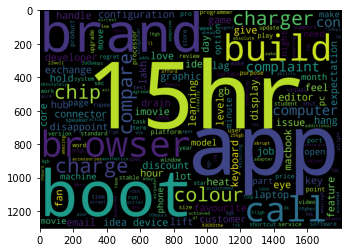

In [61]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [62]:
with open ("positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [63]:
with open ("negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:]

In [64]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [65]:
pos_text=" ".join([word for word in df if not word  in positive_words])

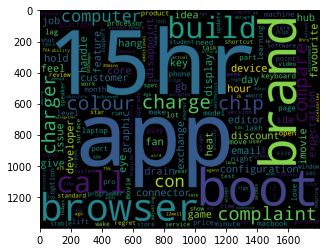

In [66]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

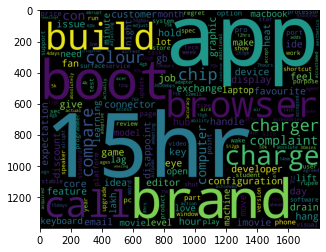

In [67]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [68]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,"\nloved every bit of this gorgeous laptop. the screen, sound quality, touch, and keypad are amazing.\n",0.750000,0.600000
1,\nthe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n,0.777778,0.644444
2,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n,0.575000,0.417857
3,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n",0.469872,0.358333
4,\nthis laptop is not having smc options as we have in intel- macbook.\n,0.000000,0.000000
...,...,...,...
325,"\namazing form factor and m1 rocks, blazing fast with no heating issues. battery life feels revolutionised.\n",0.750000,0.400000
326,\neverything good\n,0.600000,0.700000
327,\namazing battery life and great performance\n,0.825000,0.700000
328,\nthe best laptop as of date.\n,0.300000,1.000000


In [69]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,"\nloved every bit of this gorgeous laptop. the screen, sound quality, touch, and keypad are amazing.\n",0.750000,0.600000,Positive
1,\nthe battery backup is just awesome as it easily lasts me for more than a day with non-stop browsing and surfing the internet and use of google chrome.\n,0.777778,0.644444,Positive
2,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n,0.575000,0.417857,Positive
3,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n",0.469872,0.358333,Positive
4,\nthis laptop is not having smc options as we have in intel- macbook.\n,0.000000,0.000000,Neutral
...,...,...,...,...
325,"\namazing form factor and m1 rocks, blazing fast with no heating issues. battery life feels revolutionised.\n",0.750000,0.400000,Positive
326,\neverything good\n,0.600000,0.700000,Positive
327,\namazing battery life and great performance\n,0.825000,0.700000,Positive
328,\nthe best laptop as of date.\n,0.300000,1.000000,Positive


In [70]:
review_data['analysis'].value_counts()

Positive    266
Neutral      40
Negative     24
Name: analysis, dtype: int64

In [71]:
#positive comments
((270+35)/330)*100

92.42424242424242

In [72]:
#negative comments
(25/330)*100

7.575757575757576